In [1]:
# Packages
import pandas as pd
import numpy as np
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
DF1=pd.read_csv(r"C:\Users\HARIHARAN\Documents\project\ResaleFlatPricesBasedonApprovalDate19901999.csv")
DF1.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000


In [3]:
DF2=pd.read_csv(r"C:\Users\HARIHARAN\Documents\project\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
DF2.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0


In [4]:

DF3=pd.read_csv(r"C:\Users\HARIHARAN\Documents\project\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
DF3.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0


In [5]:
DF4=pd.read_csv(r"C:\Users\HARIHARAN\Documents\project\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
DF4.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [6]:
DF5=pd.read_csv(r"C:\Users\HARIHARAN\Documents\project\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
DF5.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


In [7]:
### preprocessing
DF1.shape,DF2.shape,DF3.shape,DF4.shape,DF5.shape

((287196, 10), (369651, 10), (52203, 10), (37153, 11), (179457, 11))

In [8]:
#DF1, DF2 and DF3 does not have a "remaining_lease" column so, I choose the DF4 and DF5 only

#concadinating the DF4 and DF5

df= pd.concat([DF4,DF5],ignore_index=True)
df.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
216608,2024-05,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,145.0,Apartment,1988,63 years 03 months,735000.0
216609,2024-05,YISHUN,EXECUTIVE,834,YISHUN ST 81,04 TO 06,154.0,Maisonette,1988,62 years 09 months,948000.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216610 entries, 0 to 216609
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                216610 non-null  object 
 1   town                 216610 non-null  object 
 2   flat_type            216610 non-null  object 
 3   block                216610 non-null  object 
 4   street_name          216610 non-null  object 
 5   storey_range         216610 non-null  object 
 6   floor_area_sqm       216610 non-null  float64
 7   flat_model           216610 non-null  object 
 8   lease_commence_date  216610 non-null  int64  
 9   remaining_lease      216610 non-null  object 
 10  resale_price         216610 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 18.2+ MB


In [10]:

# This Dataset have not any null values
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [12]:
#### Encoding the catogarical columns and changing the datatype

In [13]:
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [14]:
# Creating a new column "address"
df["address"]= df["block"]+" "+df["street_name"]

In [15]:
df.drop(["block","street_name"],axis=1,inplace=True)

In [16]:
df.tail(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
216608,2024-05,YISHUN,EXECUTIVE,04 TO 06,145.0,Apartment,1988,63 years 03 months,735000.0,360 YISHUN RING RD
216609,2024-05,YISHUN,EXECUTIVE,04 TO 06,154.0,Maisonette,1988,62 years 09 months,948000.0,834 YISHUN ST 81


In [17]:
# for month
df["month"] = pd.to_datetime(df["month"],format="%Y-%m")# changing dtype to datetime format 


In [18]:
# create a feature year to seperate year from feature month
df["Year"]=df["month"].dt.year 
df["month"]=df["month"].dt.month

In [19]:

df.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,Year
0,1,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10,2015


In [20]:
df["town"].unique(),df["town"].nunique()

(array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
        'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
        'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
        'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
        'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
        'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object),
 26)

In [21]:
df["flat_type"].unique(),df["flat_type"].nunique()

(array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
        'MULTI-GENERATION'], dtype=object),
 7)

In [22]:
df["flat_model"].unique(),df["flat_model"].nunique()

(array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
        'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
        'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
        'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
        'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
       dtype=object),
 21)

In [23]:

# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df["town"]= LabelEncoder().fit_transform(df["town"])
df["flat_type"]= LabelEncoder().fit_transform(df[["flat_type"]])
df["flat_model"]= LabelEncoder().fit_transform(df[["flat_model"]])

In [24]:

df["town"].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [25]:

df["flat_type"].unique()

array([2, 3, 4, 1, 5, 0, 6])

In [26]:

df["flat_model"].unique()

array([ 5, 12,  8, 17, 16, 13,  7,  3, 10, 19, 20,  2, 18,  4,  9, 15, 11,
       14,  6,  0,  1])

In [27]:

df.tail(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,Year
216608,5,25,5,04 TO 06,145.0,3,1988,63 years 03 months,735000.0,360 YISHUN RING RD,2024
216609,5,25,5,04 TO 06,154.0,7,1988,62 years 09 months,948000.0,834 YISHUN ST 81,2024


In [28]:
df[["storey_start","storey_end"]] = df["storey_range"].str.split("TO",expand=True)


In [29]:

df.drop(["storey_range"],axis=1,inplace=True)

In [30]:
df["storey_start"] = df["storey_start"].astype(int)
df["storey_end"] = df["storey_end"].astype(int)

In [31]:

df.head(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,Year,storey_start,storey_end
0,1,0,2,60.0,5,1986,70,255000.0,174 ANG MO KIO AVE 4,2015,7,9
1,1,0,2,68.0,12,1981,65,275000.0,541 ANG MO KIO AVE 10,2015,1,3


In [32]:

df["address"].nunique()

9585

In [33]:
# Address have 9585 unique values in the 216129	 , so i encode it for the correlation checking
# I chooshing the "LabelEncoder" for the "address" column

df["address"]= LabelEncoder().fit_transform(df["address"])

In [34]:
df.head(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,Year,storey_start,storey_end
0,1,0,2,60.0,5,1986,70,255000.0,1634,2015,7,9
1,1,0,2,68.0,12,1981,65,275000.0,6592,2015,1,3


In [35]:
# "remaining_lease" have a "60 years 8 months" this type of data ,
# so we want to split the year and month separately for the correlation checking

slice_values= []
for i in df["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    slice_values.append(n)

In [36]:
df_data= pd.DataFrame(slice_values,columns=["remaining_lease_year", "remaining_lease_month"])


In [37]:
df_data["remaining_lease_year"]= df_data["remaining_lease_year"].astype(int)
df_data["remaining_lease_month"]= df_data["remaining_lease_month"].fillna(0).astype(int)


In [38]:

#droping the "remaining_lease" column
df.drop(columns=["remaining_lease"],inplace= True)

In [39]:
df_1= pd.concat([df,df_data],axis=1)

In [40]:
df_1.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'Year',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month'],
      dtype='object')

In [41]:
# rearranging the columns
df_2= df_1[['Year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

In [42]:
df_2.sort_values(by=["Year","month"])

,Year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2,60.0,5,1634,7,9,70,0,1986,255000.0
1,2015,1,0,2,68.0,12,6592,1,3,65,0,1981,275000.0
2,2015,1,0,2,69.0,12,1465,1,3,64,0,1980,285000.0
3,2015,1,0,2,68.0,12,5432,1,3,63,0,1979,290000.0
4,2015,1,0,2,68.0,12,6746,7,9,64,0,1980,290000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216605,2024,5,25,4,113.0,5,6263,4,6,92,10,2018,720000.0
216606,2024,5,25,5,154.0,7,4404,4,6,63,4,1988,850000.0
216607,2024,5,25,5,146.0,3,8656,4,6,62,5,1987,815000.0
216608,2024,5,25,5,145.0,3,4513,4,6,63,3,1988,735000.0


In [43]:
df_2.to_csv("ResaleFlatPrices.csv", index= False)

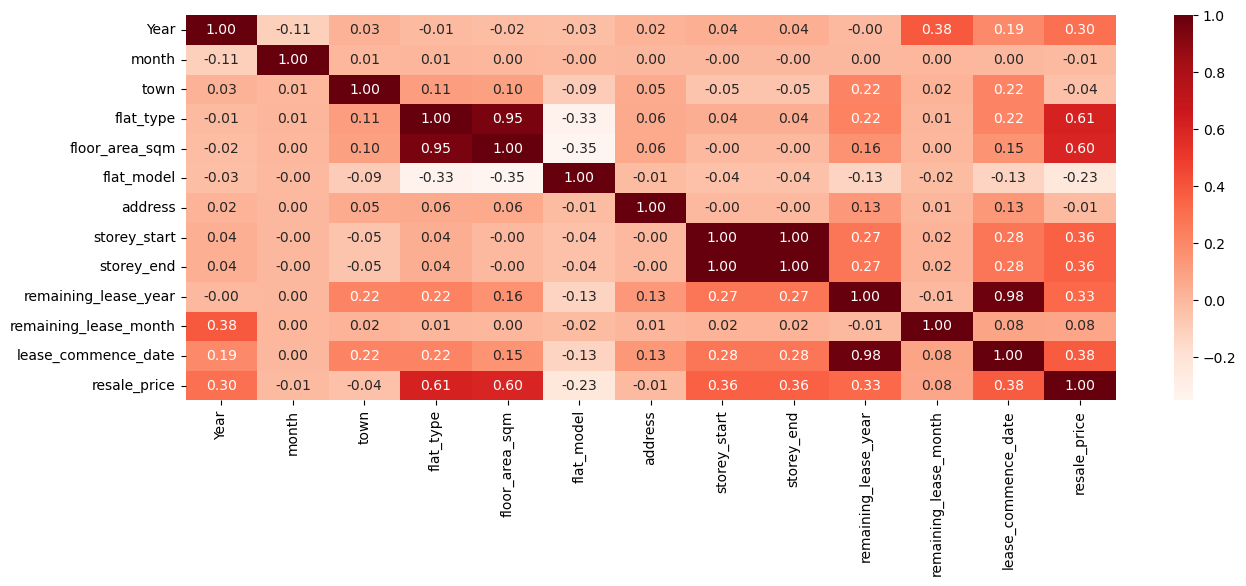

In [44]:
# Checking the Correlation using heatmap

df_2_corr= df_2.corr()
plt.figure(figsize=(15,5))
sns.heatmap(df_2_corr,annot= True, cmap="Reds", fmt=".2f")
plt.show()

In [45]:
df_final= pd.read_csv(r"C:\Users\HARIHARAN\Documents\project\ResaleFlatPrices.csv")
df_final.head(2)

,Year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2,60.0,5,1634,7,9,70,0,1986,255000.0
1,2015,1,0,2,68.0,12,6592,1,3,65,0,1981,275000.0


In [46]:
###Checking the duplicate values
df_final.duplicated().sum()

308

In [47]:
df_final_1= df_final.drop_duplicates()
df_final_1.reset_index(drop= True, inplace= True)

In [48]:
df_final_1.duplicated().sum()

0

In [49]:
df_final_1.tail(2)

,Year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
216300,2024,5,25,5,145.0,3,4513,4,6,63,3,1988,735000.0
216301,2024,5,25,5,154.0,7,8925,4,6,62,9,1988,948000.0


In [50]:
# The month,address column does have very lowest correlation with other features
# So I drop the month and address columns

df_final_2= df_final_1.drop(columns=["month","address"])

df_final_2.tail(2)

,Year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
216300,2024,25,5,145.0,3,4,6,63,3,1988,735000.0
216301,2024,25,5,154.0,7,4,6,62,9,1988,948000.0


In [51]:
###Detecting the skewed columns using plot
def plot(df,column):
    
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot
  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot
  plt.subplot(1,3,3)
  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

In [52]:
df_final_2.columns

Index(['Year', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month', 'lease_commence_date', 'resale_price'],
      dtype='object')

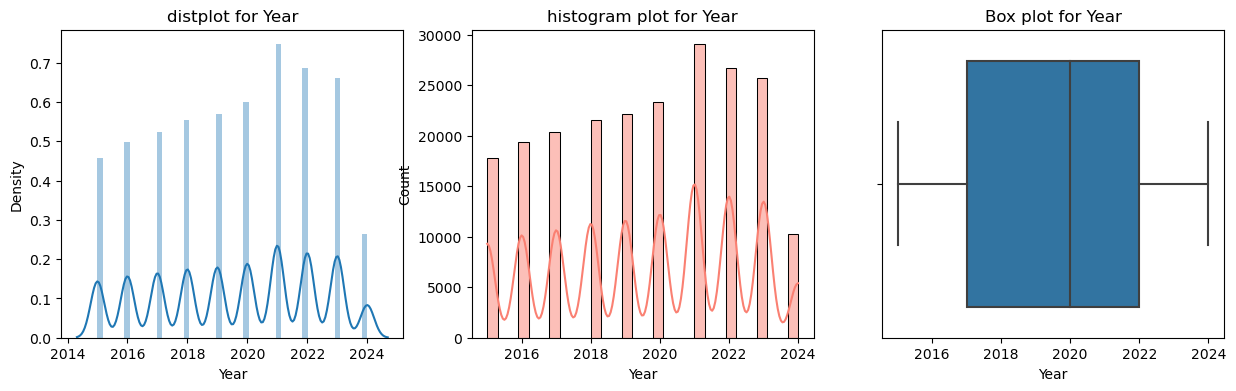

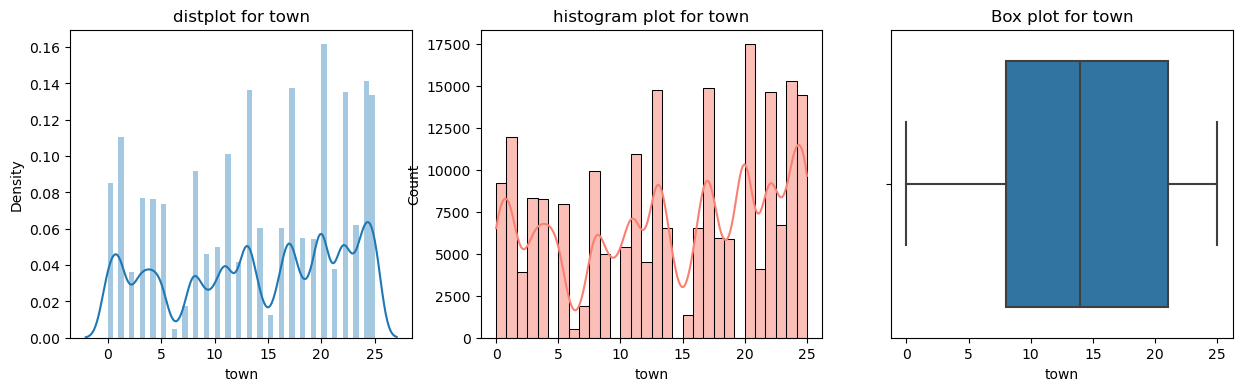

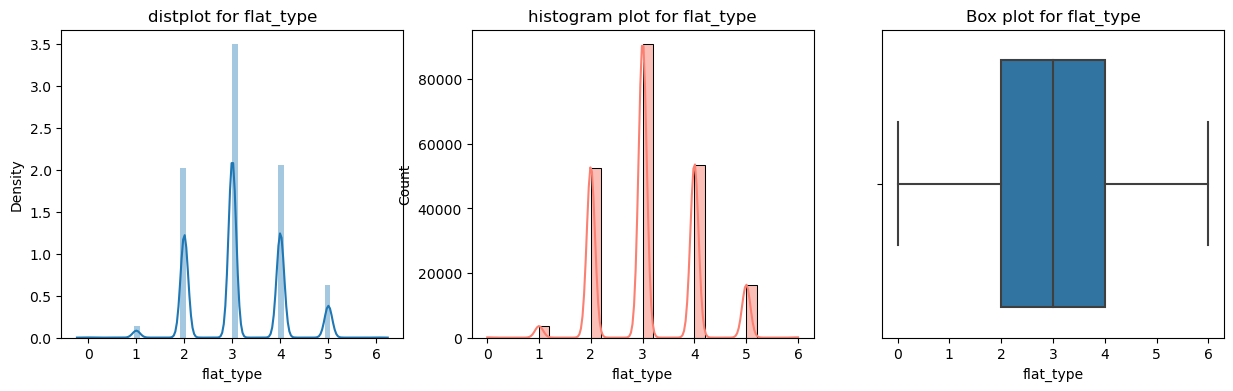

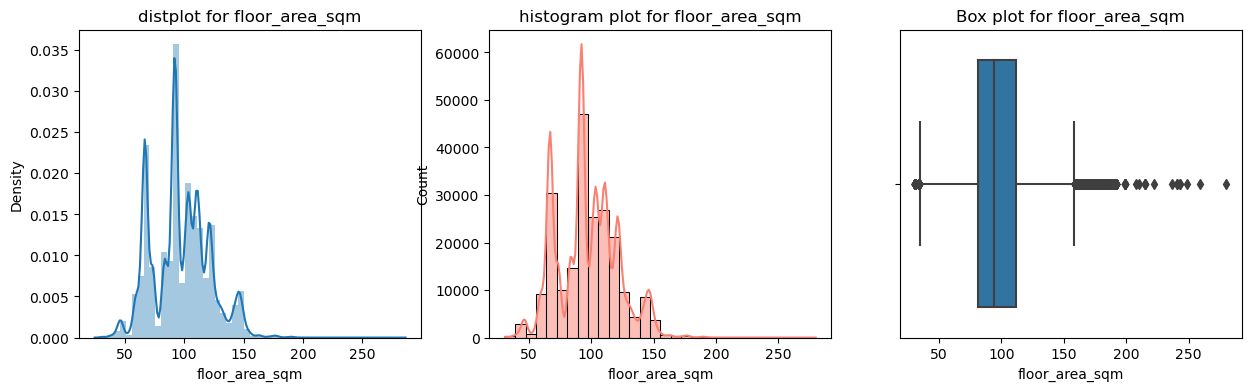

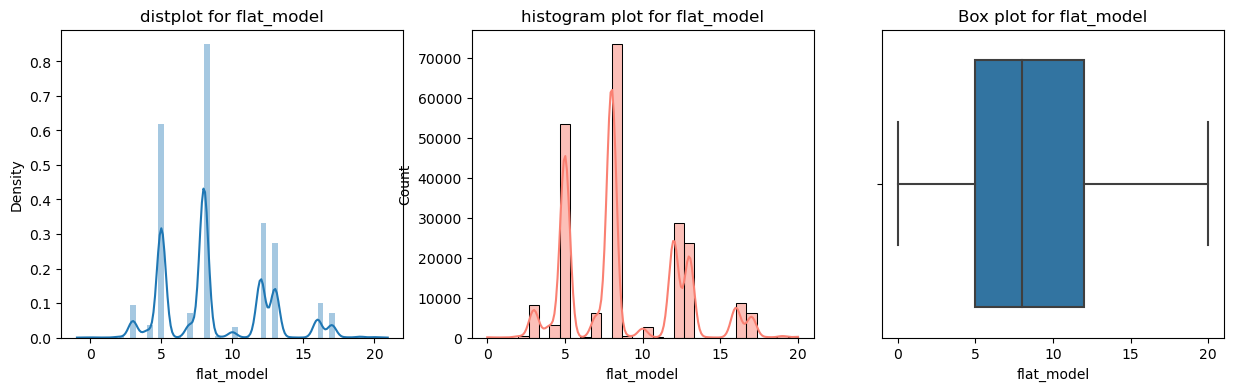

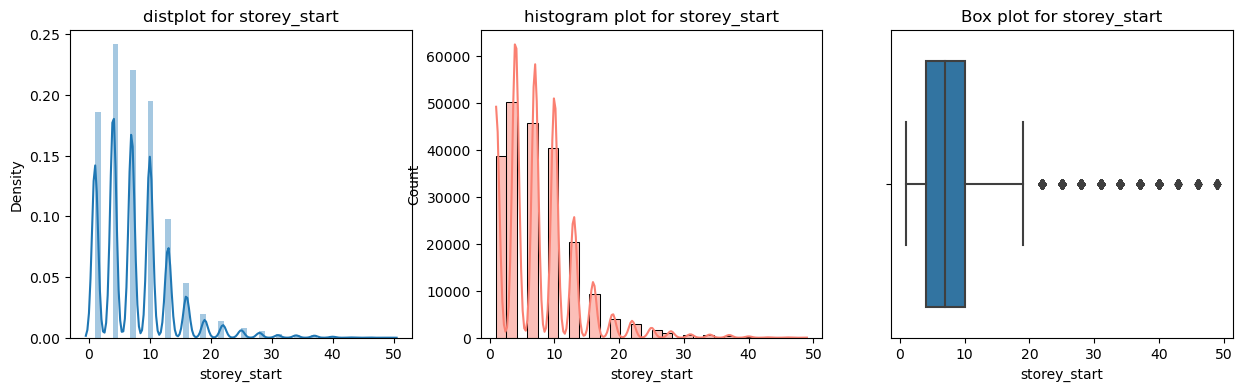

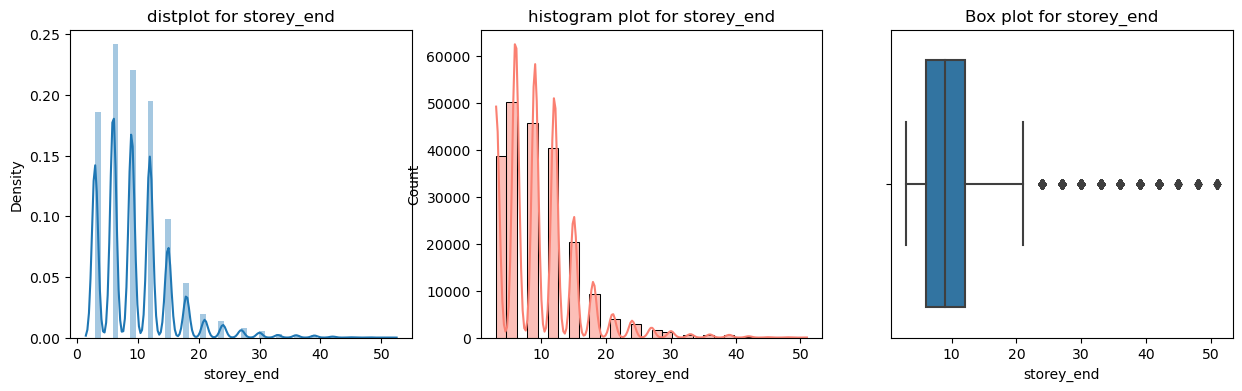

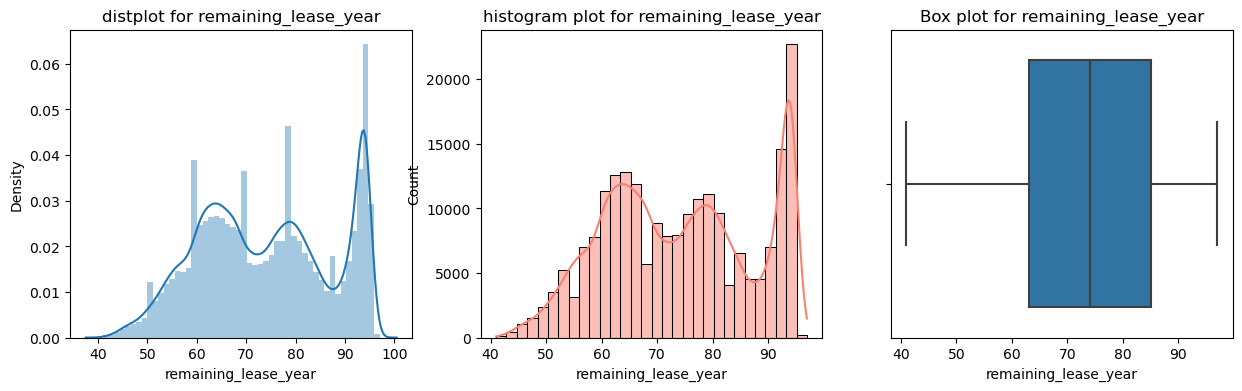

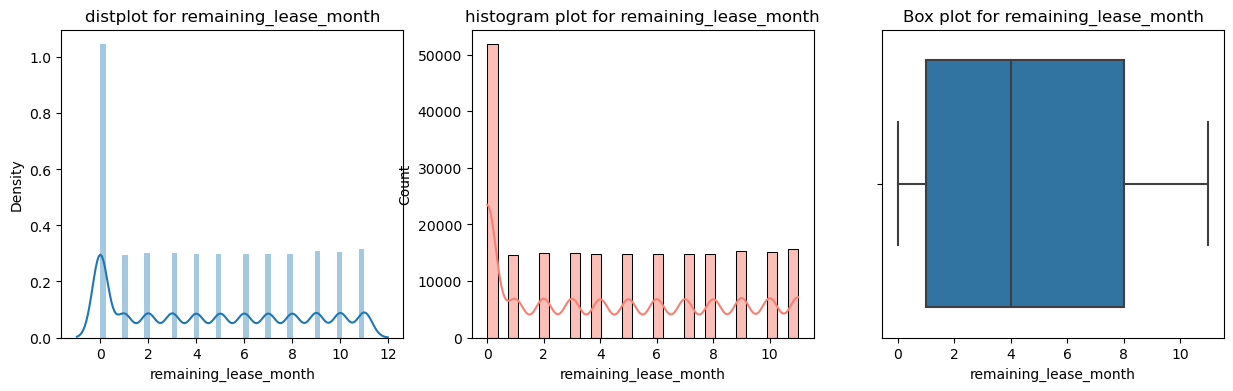

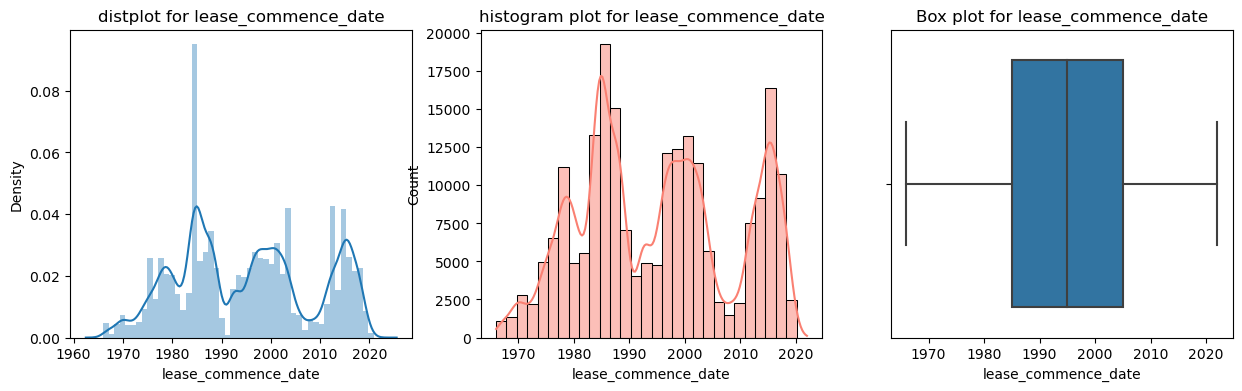

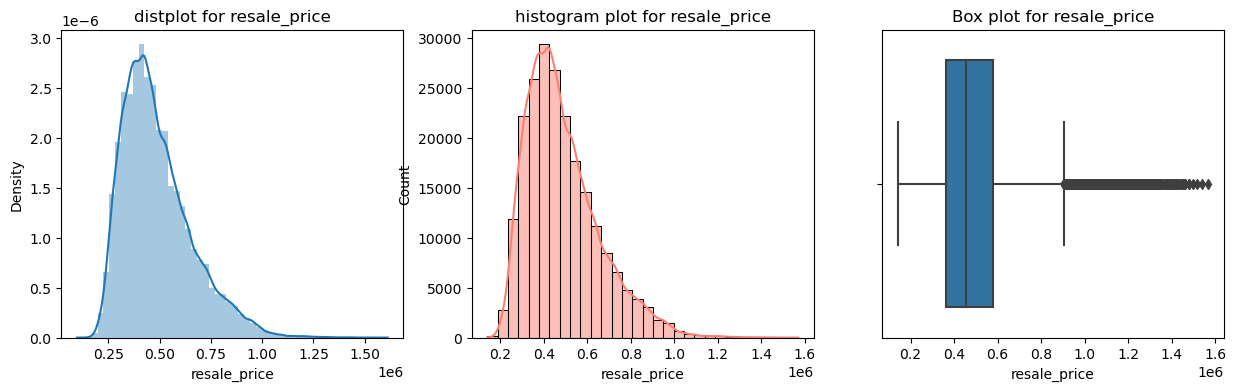

In [53]:
for i in df_final_2.columns:
    plot(df_final_2,i)

In [54]:
df_final_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,216302.0,2019.576176,2.667291,2015.0,2017.0,2020.0,2022.0,2024.0
town,216302.0,13.894569,7.956682,0.0,8.0,14.0,21.0,25.0
flat_type,216302.0,3.121303,0.919201,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,216302.0,97.147613,24.056048,31.0,81.0,94.0,112.0,280.0
flat_model,216302.0,8.692915,3.647548,0.0,5.0,8.0,12.0,20.0
storey_start,216302.0,7.657567,5.844522,1.0,4.0,7.0,10.0,49.0
storey_end,216302.0,9.657567,5.844522,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,216302.0,74.113281,13.463120,41.0,63.0,74.0,85.0,97.0
remaining_lease_month,216302.0,4.594289,3.782917,0.0,1.0,4.0,8.0,11.0
lease_commence_date,216302.0,1995.124543,13.669932,1966.0,1985.0,1995.0,2005.0,2022.0


In [55]:
###skewness handling
# The Skewed Columns are

# 1. storey_start
# 2. storey_end
# 3. resale_price
df_final_3= df_final_2.copy()

In [56]:
df_final_3["storey_start"]= np.log(df_final_3["storey_start"])
df_final_3["storey_end"]= np.log(df_final_3["storey_end"])
df_final_3["resale_price"]= np.log(df_final_3["resale_price"])

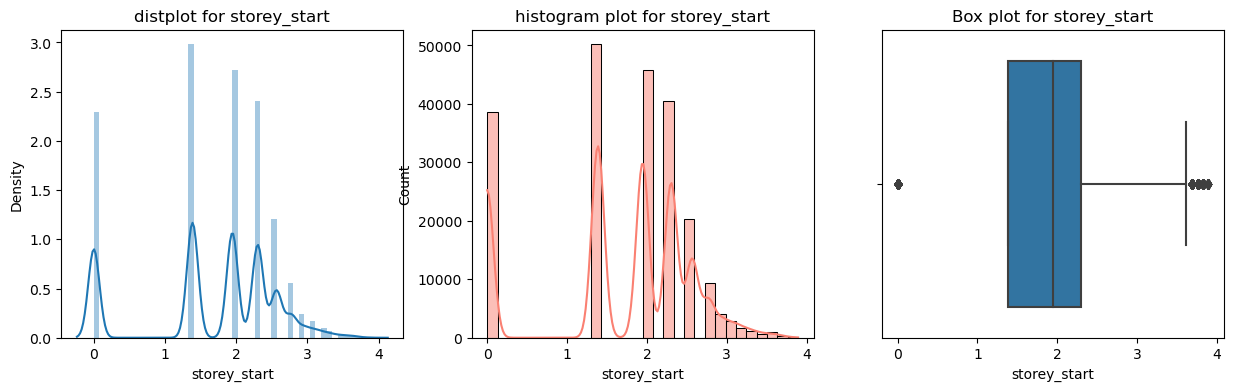

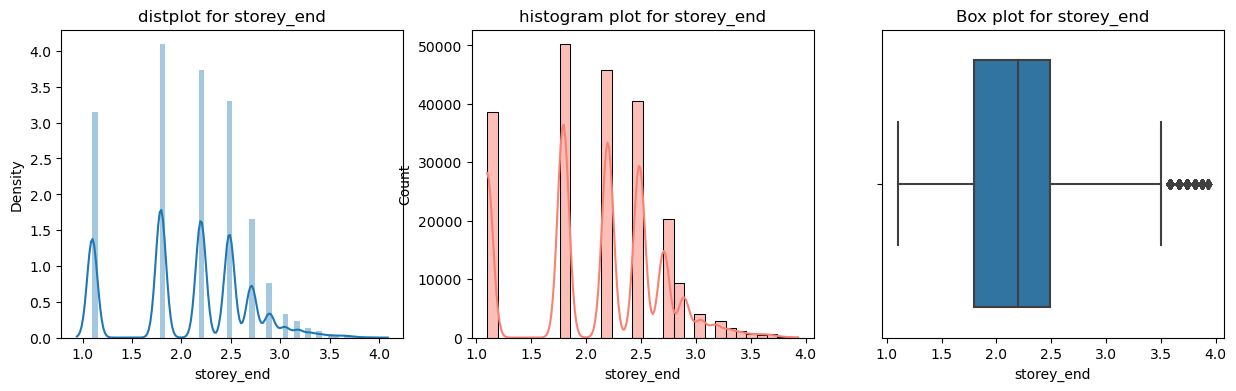

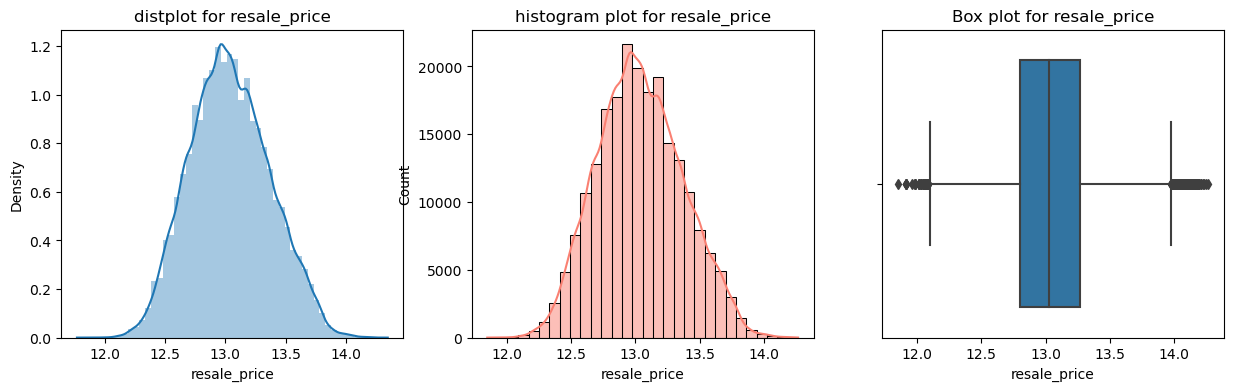

In [57]:
skewed_columns=["storey_start","storey_end","resale_price"]
for i in skewed_columns:
    plot(df_final_3,i)

In [58]:
## Outliers Handling - Interquartile Range(IQR) Method
df_final_4= df_final_3.copy()

In [59]:
# The Outlier Columns are

# 1. floor_area_sqm
# 2. storey_start
# 3. sortey_end
# 4. resale_price

# Recorrect the Outliers
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [60]:
outlier_columns=["floor_area_sqm","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(df_final_4,j)

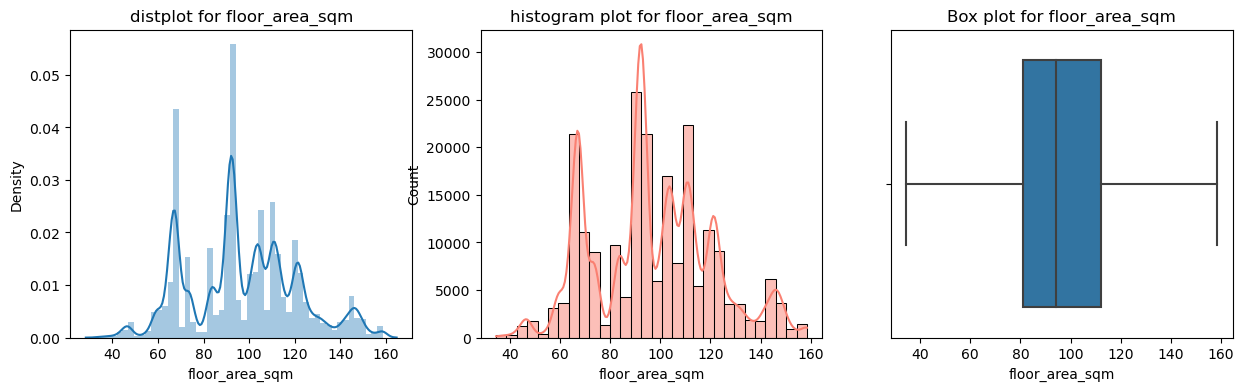

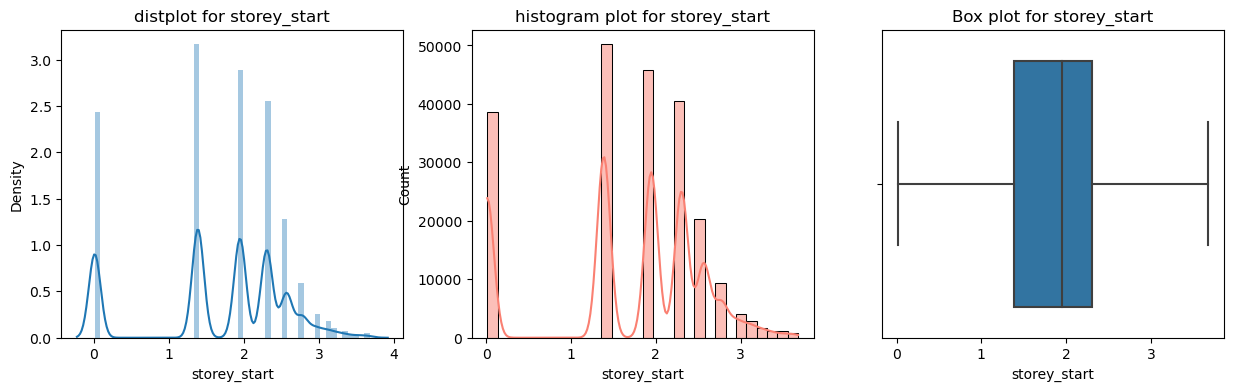

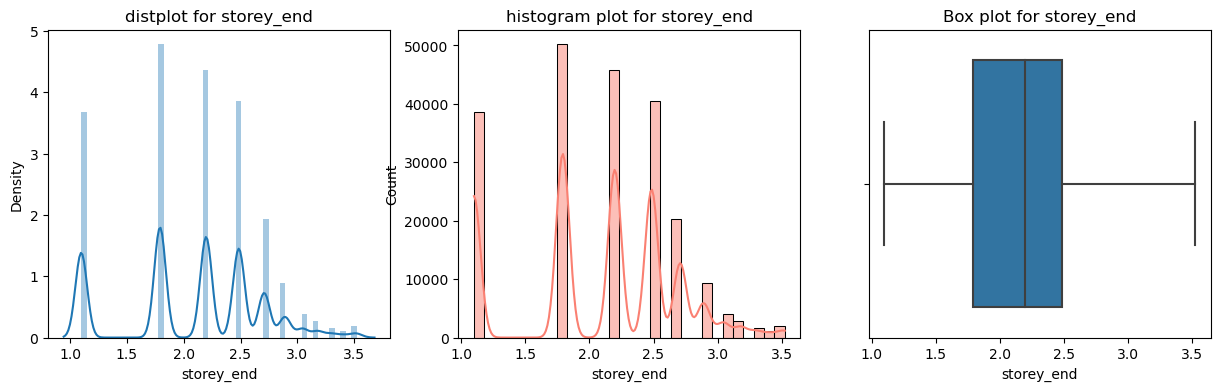

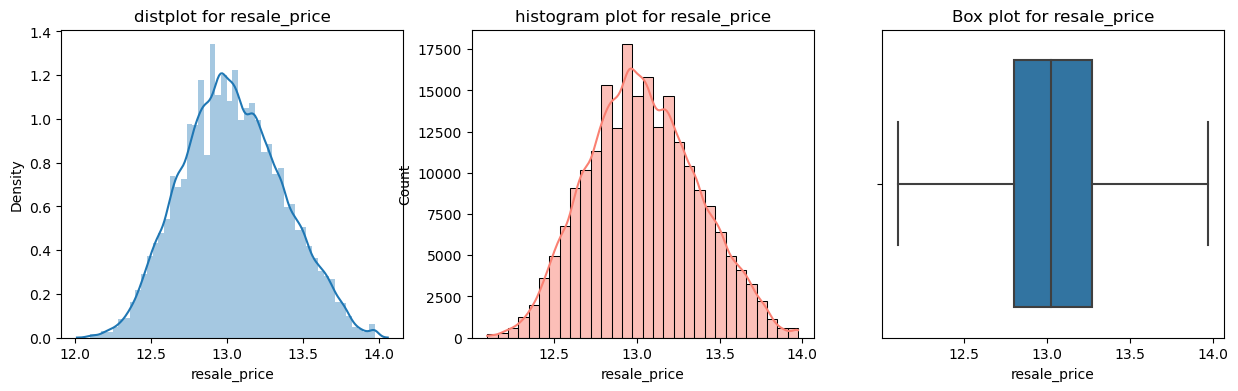

In [61]:
for k in outlier_columns:
    plot(df_final_4,k)

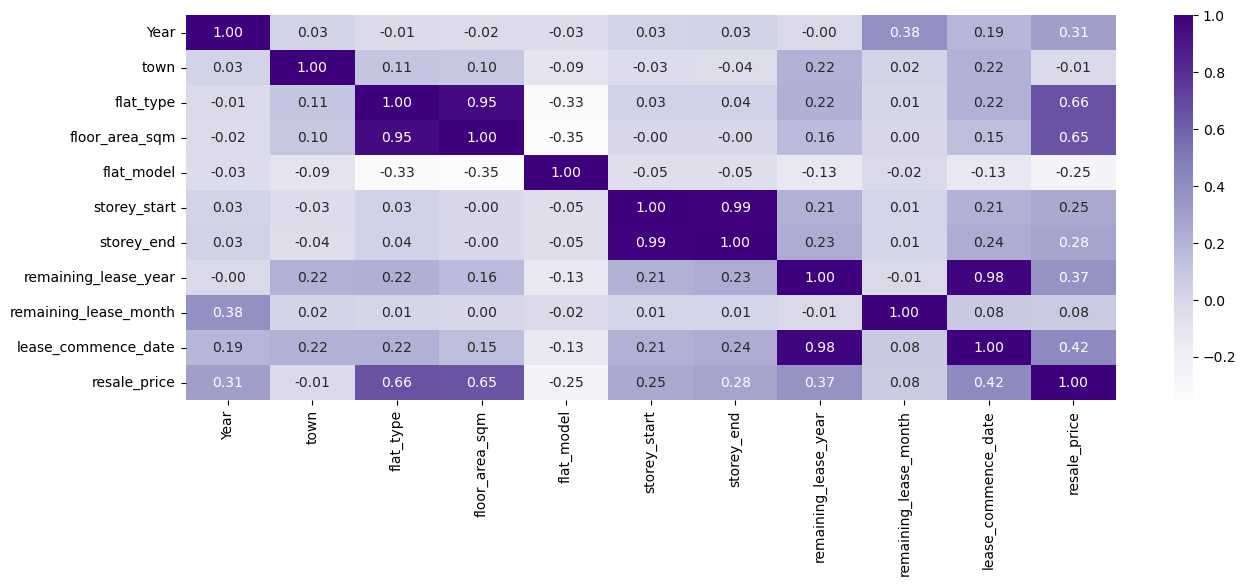

In [62]:
# Checking the correlation after the outlier recorrection
plt.figure(figsize=(15,5))
sns.heatmap(df_final_4.corr(), annot= True, cmap="Purples", fmt="0.2f")
plt.show()

In [63]:
##Model Selection (Regression)
df_final_5= df_final_4.copy()

In [64]:
df_final_5.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,216302.0,2019.576176,2.667291,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
town,216302.0,13.894569,7.956682,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,216302.0,3.121303,0.919201,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,216302.0,97.074239,23.821772,34.500000,81.000000,94.000000,112.000000,158.500000
flat_model,216302.0,8.692915,3.647548,0.000000,5.000000,8.000000,12.000000,20.000000
storey_start,216302.0,1.695510,0.920838,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,216302.0,2.093303,0.601252,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,216302.0,74.113281,13.463120,41.000000,63.000000,74.000000,85.000000,97.000000
remaining_lease_month,216302.0,4.594289,3.782917,0.000000,1.000000,4.000000,8.000000,11.000000
lease_commence_date,216302.0,1995.124543,13.669932,1966.000000,1985.000000,1995.000000,2005.000000,2022.000000


In [65]:
np.exp(13.965086)

1161341.0814425494

In [66]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] >= 1135620]

,Year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
36467,2016,12,14,2,259.0,18,6815,1,3,54,0,1972,1150000.0
38448,2017,2,2,4,120.0,4,3223,40,42,93,7,2011,1180000.0
47892,2017,7,18,5,156.0,3,1226,19,21,77,3,1995,1160000.0
54395,2017,11,7,4,107.0,20,1941,43,45,92,2,2011,1138000.0
60199,2018,3,7,4,107.0,20,1938,37,39,91,10,2011,1145000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215452,2024,5,6,4,122.0,5,1583,13,15,63,3,1988,1180000.0
215458,2024,5,7,4,106.0,20,1939,37,39,85,9,2011,1515000.0
215727,2024,5,14,2,189.4,18,4634,1,3,47,3,1972,1150000.0
216036,2024,5,21,5,146.0,7,3953,4,6,60,9,1986,1180000.0


In [67]:
np.exp(12.104402)

180665.40349425227

In [68]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] <= 180665]

,Year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
47067,2017,7,4,0,31.0,5,8079,4,6,56,8,1975,175000.0
62238,2018,4,10,1,42.0,17,6200,4,6,49,9,1969,180000.0
62989,2018,4,21,2,64.0,5,3554,13,15,59,2,1978,170000.0
64274,2018,5,15,1,42.0,5,1413,1,3,55,11,1975,180000.0
65495,2018,6,4,0,31.0,5,8079,1,3,55,10,1975,176000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120053,2020,11,4,1,42.0,17,5840,10,12,48,5,1970,180000.0
126747,2021,1,24,1,45.0,5,2342,7,9,64,5,1986,180000.0
127297,2021,2,4,0,31.0,5,8079,4,6,53,1,1975,180000.0
197151,2023,8,22,2,67.0,8,6372,7,9,91,3,2015,150000.0


In [71]:
## Create the model for "resale_price" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [72]:
df.head()

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,Year,storey_start,storey_end
0,1,0,2,60.0,5,1986,255000.0,1634,2015,7,9
1,1,0,2,68.0,12,1981,275000.0,6592,2015,1,3
2,1,0,2,69.0,12,1980,285000.0,1465,2015,1,3
3,1,0,2,68.0,12,1979,290000.0,5432,2015,1,3
4,1,0,2,68.0,12,1980,290000.0,6746,2015,7,9


In [73]:
# Train Test Split for model selection
def select_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["resale_price"])
    y= df["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")


In [74]:
select_model(df_final_5, LinearRegression)
select_model(df_final_5, DecisionTreeRegressor)
select_model(df_final_5, RandomForestRegressor)
select_model(df_final_5, AdaBoostRegressor)
select_model(df_final_5, ExtraTreesRegressor)
select_model(df_final_5, GradientBoostingRegressor)
select_model(df_final_5, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.6741475974815178, 'Mean_squared_error': 0.03570641610828883, 'Root_mean_squared_error': 0.18896141433713082, 'Mean_absolute_error': 0.14789202856259367}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.672552206088773, 'Mean_squared_error': 0.03594545301169079, 'Root_mean_squared_error': 0.18959286118335467, 'Mean_absolute_error': 0.14868754029492495}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9962290930237898, 'Mean_squared_error': 0.0004132103141101499, 'Root_mean_squared_error': 0.020327575214721255, 'Mean_absolute_error': 0.007250794108068939}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9265317044442319, 'Mean_squared_error': 0.008064953298982437, 'Root_mean_squared_error': 0.08980508503967043, 'Mean_absolute_error': 0.06414165063403975}

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9911543474738262, 'Mean_squared_error': 0.00

In [75]:
 #RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# so i select the algorithm

#x,y spliting
x= df_final_5.drop(columns=["resale_price"])
y= df_final_5["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)


{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9548326895322015, 'Mean_squared_error': 0.004958223772687431, 'Root_mean_squared_error': 0.07041465595092708, 'Mean_absolute_error': 0.051630108741954756}


In [76]:

df_final_5.iloc[10456]

Year                     2015.000000
town                        4.000000
flat_type                   2.000000
floor_area_sqm             74.000000
flat_model                  8.000000
storey_start                0.011858
storey_end                  1.098612
remaining_lease_year       68.000000
remaining_lease_month       0.000000
lease_commence_date      1985.000000
resale_price               12.815838
Name: 10456, dtype: float64

In [77]:
np.exp(12.815838)

367999.92008841544

In [78]:
user_data = np.array([[2015,4,2,74,8,0.011858,1.098612,68,0,1985]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]

12.811507895229154

In [79]:
# Saving the Model unsing pickle
with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
  pickle.dump(model_1,f)

In [80]:
import pickle
import numpy as np
with open("Resale_Flat_Prices_Model_1.pkl","rb") as f1:
    regg_model= pickle.load(f1)

In [81]:
user_data = np.array([[2015,8,5,4.955827,3,1.386294,1.791759,73,0,1990]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

12.296896171384505

In [82]:
np.exp(12.297264958249562)

219095.9319348881